# RXRX
### The 6-channel fluorescent microscopy images that comprise the RxRx1 dataset illuminate different organelles of the cell - the nucleus, endoplasmic reticulum, actin cytoskeleton, nucleolus, mitochondria, and golgi apparatus.
 The experiment uses a modified Cell Painting staining protocol (CellPainting, a high-content image-based assay for morphological profiling using multiplexed fluorescent dyes, Bray et. al., 2016) which uses 6 different stains to adhere to different parts of the cell. The stains fluoresce at different wavelengths and are therefore captured by different imaging channels; thus there are 6 images per imaging site in a well. Each image captures different morphology of the same segment of the well, like layers of a 3 dimensional structure.

The images in RxRx1 are generated by carrying out biological experiments using reagents known as siRNAs. A small interfering RNA (siRNA) is a biological reagent used to knockdown a particular gene, and every genetic perturbation used in the RxRx1 dataset is carried out via an siRNA. To understand these biological reagents, it’s important to review some key biological concepts.

In [29]:
%load_ext autoreload
%autoreload 2 

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from importlib.util import find_spec
if find_spec("cellsignal") is None:
    import sys
    sys.path.append("../")

# from cellsignal.data.data_utils import load_data

from pathlib import Path

PATH = os.path.dirname("../data/rxrx1/")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
!ls ../data/rxrx1/

LICENSE  README.md  images  metadata.csv


In [3]:
! ls ../data/rxrx1/images/HUVEC-01/Plate1/ | head -5

B02_s1_w1.png
B02_s1_w2.png
B02_s1_w3.png
B02_s1_w4.png
B02_s1_w5.png
ls: write error: Broken pipe


In [4]:
metadata = pd.read_csv(os.path.join(PATH, "metadata.csv"))

In [5]:
metadata.head()

,site_id,well_id,cell_type,dataset,experiment,plate,well,site,well_type,sirna,sirna_id
0,HEPG2-08_1_B02_1,HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,B02,1,negative_control,EMPTY,1138
1,HEPG2-08_1_B02_2,HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,B02,2,negative_control,EMPTY,1138
2,HEPG2-08_1_B03_1,HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,B03,1,treatment,s21721,855
3,HEPG2-08_1_B03_2,HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,B03,2,treatment,s21721,855
4,HEPG2-08_1_B04_1,HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,B04,1,treatment,s20894,710


In [6]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125510 entries, 0 to 125509
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   site_id     125510 non-null  object
 1   well_id     125510 non-null  object
 2   cell_type   125510 non-null  object
 3   dataset     125510 non-null  object
 4   experiment  125510 non-null  object
 5   plate       125510 non-null  int64 
 6   well        125510 non-null  object
 7   site        125510 non-null  int64 
 8   well_type   125510 non-null  object
 9   sirna       125510 non-null  object
 10  sirna_id    125510 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 10.5+ MB


In [19]:
from PIL import Image
from torchvision import transforms as T


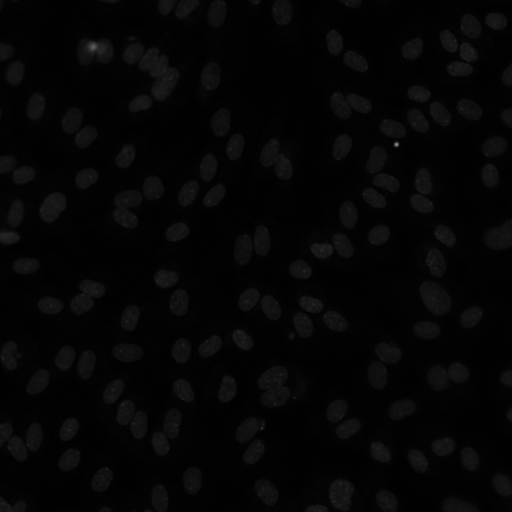

In [18]:
img_file = os.path.join(PATH, "images/HUVEC-01/Plate1/", "B02_s1_w1.png")
image = Image.open(img_file)
image

In [16]:
image.size

(512, 512)

In [45]:
img = T.ToTensor()(image)
img.shape

torch.Size([1, 512, 512])

In [48]:
img.max(), img.min()

(tensor(0.5529), tensor(0.0039))

In [52]:
from cellsignal.data import RxRx1DataModule

dm = RxRx1DataModule()

In [53]:
img = dm.load_site("HUVEC-01", 1, "B02", 1)
img.shape

torch.Size([1, 6, 512, 512])

In [61]:
img[0].max(), img[0].min()

(tensor(0.9412), tensor(0.))

In [59]:
img.dtype

torch.float32